In [1]:
# import pandas data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Loading the dataset:
df1 = pd.read_csv('Datasets_data.cso.ie\\PEA11.20231004T131042.csv')

In [3]:
# Displaying first 5 rows:
df1.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df1_col_drop = ['STATISTIC Label','UNIT']
df1.drop(df1_col_drop ,axis=1, inplace=True) 

In [5]:
# Renaming the columns
df1 = df1.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

In [6]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


In [7]:
# Dropping rows based on criteria
df1 = df1[~((df1['Sex'] == 'Both sexes') | (df1['Age_Group'] == 'All ages'))]

# Display the modified DataFrame
df1

,Year,Age_Group,Sex,Population
4,1926,Under 1 year,Male,28084
5,1926,Under 1 year,Female,27307
7,1926,1 year,Male,28374
8,1926,1 year,Female,27502
10,1926,2 years,Male,29728
...,...,...,...,...
11810,2023,97 years,Female,821
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11815,2023,99 years and over,Male,352


In [8]:
# Summing up the values by year
df1_Yearly_Sum = df1.groupby('Year')['Population'].sum().reset_index()
# Formatting the 'Value' column in millions
df1_Yearly_Sum['Population'] = df1_Yearly_Sum['Population'].apply(lambda x: '{:.3f}M'.format(x/1000000))

df1_Yearly_Sum

,Year,Population
0,1926,2.972M
1,1936,2.968M
2,1946,2.955M
3,1951,2.961M
4,1961,2.818M
5,1966,2.884M
6,1971,2.978M
7,1979,3.368M
8,1981,3.443M
9,1986,3.541M


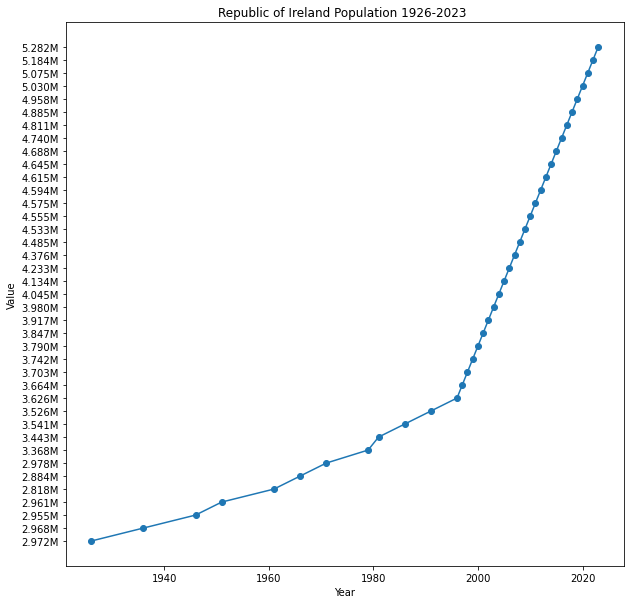

In [9]:


# Plot the standardized data
plt.figure(figsize=(10, 10))
plt.plot(df1_Yearly_Sum['Year'], df1_Yearly_Sum['Population'], marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Republic of Ireland Population 1926-2023 ')
plt.yticks(df1_Yearly_Sum['Population'])
plt.show()


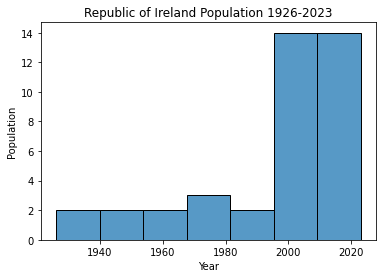

In [10]:
import seaborn as sns
ax = sns.histplot(df1_Yearly_Sum.Year)
ax.set(xlabel='Year', ylabel='Population', title ='Republic of Ireland Population 1926-2023');

In [11]:
# Loading the dataset:
df2 = pd.read_csv('Datasets_data.cso.ie\\PEA07.20231004T131011.csv')

In [12]:
# Displaying first 5 rows:
df2.head()

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
0,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1996,Thousand,250.4
1,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1997,Thousand,250.0
2,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1998,Thousand,253.7
3,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1999,Thousand,259.8
4,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2000,Thousand,266.2


In [13]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df2_col_drop = ['Statistic Label','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True)  

In [14]:
df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

In [15]:
df2

,Age Group,Sex,Regional Authority Area,Year,VALUE
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [16]:
# Renaming the columns
df2 = df2.rename(columns={'Age Group': 'Age_Group','Regional Authority Area':'Area','VALUE':'Population'})

In [17]:
df2

,Age_Group,Sex,Area,Year,Population
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [18]:
# Dropping rows based on criteria
df2 = df2[~((df2['Sex'] == 'Both sexes') | (df2['Area'] == 'State') | (df2['Age_Group'] == 'All ages'))]

# Display the modified DataFrame
df2

,Age_Group,Sex,Area,Year,Population
220,0 - 4 years,Male,Border,1996,11900.0
221,0 - 4 years,Male,Border,1997,13900.0
222,0 - 4 years,Male,Border,1998,14100.0
223,0 - 4 years,Male,Border,1999,14500.0
224,0 - 4 years,Male,Border,2000,15200.0
...,...,...,...,...,...
10687,85 years and over,Female,South-West,2013,6300.0
10688,85 years and over,Female,South-West,2014,6500.0
10689,85 years and over,Female,South-West,2015,6700.0
10690,85 years and over,Female,South-West,2016,6800.0


In [19]:
# Finding the sum of 'VALUE' per 'Area', 'Year', and 'Sex'
df2_Sum_Area_Year = df2.groupby(['Year','Area'])['Population'].sum().reset_index()

# Converting the series to a DataFrame
df2_Sum_Area_Year = pd.DataFrame(df2_Sum_Area_Year)

df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352200.0
1,1996,Dublin,407400.0
2,1996,Mid-East,1058600.0
3,1996,Mid-West,205600.0
4,1996,Midland,347500.0
...,...,...,...
171,2017,Mid-West,386900.0
172,2017,Midland,297400.0
173,2017,South-East,515400.0
174,2017,South-West,691200.0


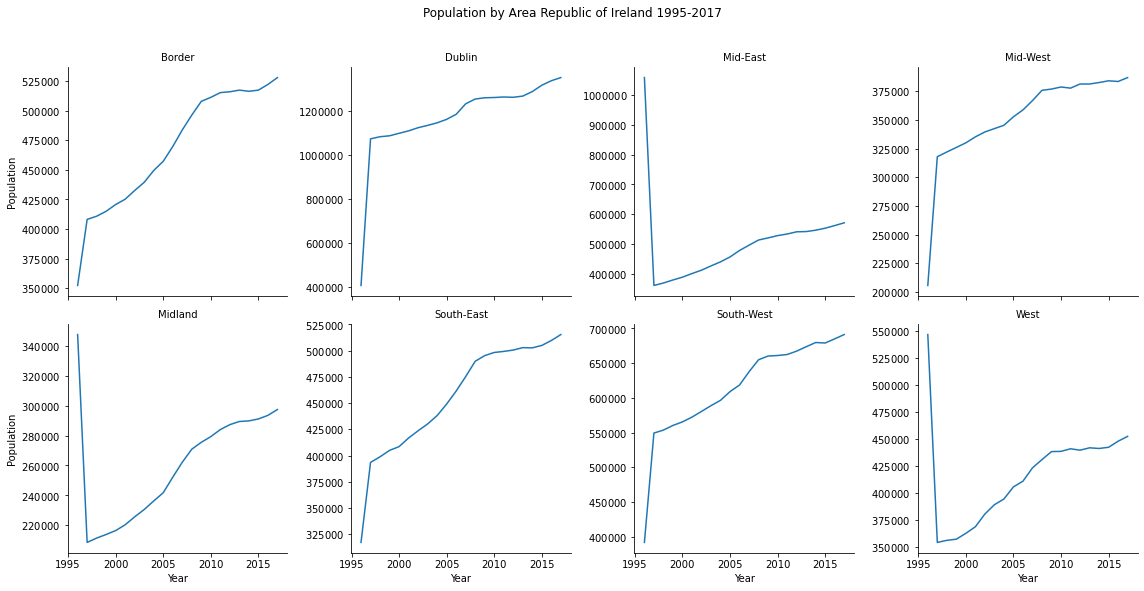

In [20]:
from matplotlib.ticker import ScalarFormatter
# Creating small multiples of line plots
g = sns.FacetGrid(df2_Sum_Area_Year, col="Area", col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, "Year", "Population")
g.set_titles("{col_name}")
g.set_xlabels("Year")
g.set_ylabels("Population")
g.fig.suptitle("Population by Area Republic of Ireland 1995-2017", y=1.02)
# Formatting the y-axis tick labels to display full numbers
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout() 
plt.show()


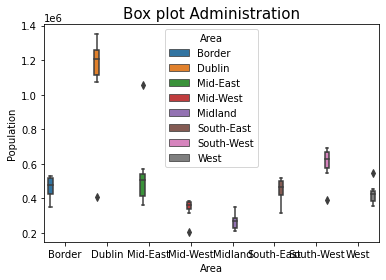

In [21]:
sns.boxplot(x = 'Area', y ='Population', data=df2_Sum_Area_Year, hue = 'Area')
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [22]:
df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352200.0
1,1996,Dublin,407400.0
2,1996,Mid-East,1058600.0
3,1996,Mid-West,205600.0
4,1996,Midland,347500.0
...,...,...,...
171,2017,Mid-West,386900.0
172,2017,Midland,297400.0
173,2017,South-East,515400.0
174,2017,South-West,691200.0


# Area breakdown:

1. **Border**: Cavan, Donegal, Leitrim, Monaghan, Sligo.

2. **Midland**: Laois, Longford, Offaly, Westmeath.

3. **West**: Galway, Mayo, Roscommon.

4. **Dublin**: Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

5. **Mid-East**: Kildare, Louth, Meath, Wicklow.

6. **Mid-West**: Clare, Limerick, Tipperary.

7. **South-East**: Carlow, Kilkenny, Waterford, Wexford.

8. **South-West**: Cork, Kerry.

